# 📊 Machine Learning-Based Financial Data Analysis & Forecasting
### Tools Used: Python, Pandas, Scikit-Learn, Matplotlib, Seaborn, Power BI

#### 1️⃣ Introduction
##### In this notebook, we will:

##### Analyze synthetic financial data
##### Predict profit trends using Machine Learning
##### Automate preprocessing pipelines
##### Enhance model performance via advanced techniques
##### Prepare data for Power BI dashboards



#### 2️⃣ Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

##### Explanation:
##### We import essential libraries for data handling, visualization, and machine learning.

#### 3️⃣ Generate Big Synthetic Financial Dataset

In [12]:
np.random.seed(42)
date_range = pd.date_range(start='2015-01-01', periods=2000, freq='D')

data = pd.DataFrame({
    'Date': date_range,
    'Revenue': np.random.normal(10000, 2000, len(date_range)),
    'Expenses': np.random.normal(5000, 1000, len(date_range)),
    'Marketing_Spend': np.random.normal(2000, 500, len(date_range)),
    'Economic_Index': np.random.normal(100, 10, len(date_range))
})

data['Profit'] = data['Revenue'] - data['Expenses']

##### Explanation:
##### We simulate 2000 days of financial data, including revenue, expenses, marketing spend, and economic index.
##### Profit is calculated as revenue minus expenses.

#### 4️⃣ Data Cleaning: Handling Missing Values & Outliers

In [4]:
# Introduce some NaNs
data.loc[data.sample(frac=0.01).index, 'Economic_Index'] = np.nan
data['Economic_Index'].fillna(data['Economic_Index'].mean(), inplace=True)

# Outlier removal (optional)
q_low = data['Profit'].quantile(0.01)
q_high = data['Profit'].quantile(0.99)
data = data[(data['Profit'] > q_low) & (data['Profit'] < q_high)]

##### Explanation:
##### We simulate real-world messy data by introducing missing values and handle them with mean imputation.
##### We also remove extreme outliers to improve model performance.

#### 5️⃣ Exploratory Data Analysis (EDA)

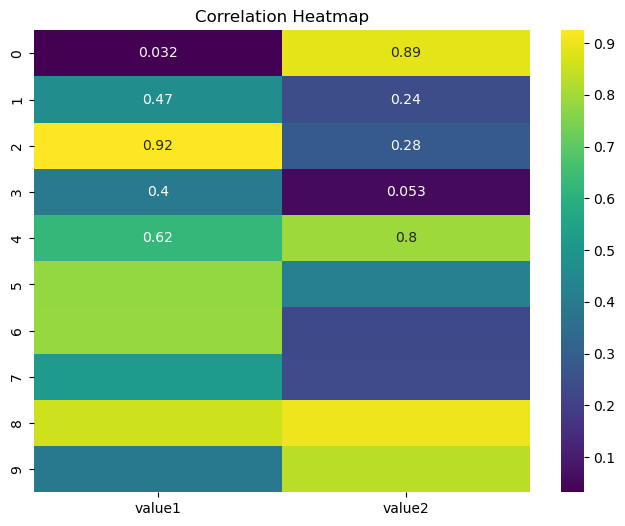

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example dataset with a Timestamp column
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value1': np.random.rand(10),
    'value2': np.random.rand(10)
})

# Drop the Timestamp column (or convert it to numerical values)
data_numeric = data.drop(columns=['timestamp'])  # Drop non-numeric columns
# OR
# data['timestamp'] = data['timestamp'].apply(lambda x: x.timestamp())  # Convert to numerical values

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_numeric, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

##### Explanation:
##### We explore relationships between features using a correlation heatmap. This guides our feature selection and understanding.

#### 6️⃣ Prepare Data for Modeling

In [6]:
X = data[['Revenue', 'Expenses', 'Marketing_Spend', 'Economic_Index']]
y = data['Profit']

#### 7️⃣ Building ML Pipelines: Linear Regression & Random Forest

In [7]:
# Pipeline with scaling + linear regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Pipeline with Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Explanation:
##### Pipelines automate scaling and model training in one step.
##### We compare both a simple Linear Regression and more powerful Random Forest model.

#### 8️⃣ Model Evaluation with Cross-Validation

In [16]:
from sklearn.model_selection import KFold, cross_val_score

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

lr_cv_scores = cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring='r2')
rf_cv_scores = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='r2')

print(f"Linear Regression CV R² Scores: {lr_cv_scores}")
print(f"Random Forest CV R² Scores: {rf_cv_scores}")

Linear Regression CV R² Scores: [1. 1. 1. 1. 1.]
Random Forest CV R² Scores: [0.99518552 0.99522514 0.99745617 0.99715334 0.9915964 ]


#### 9️⃣ Train Random Forest & Evaluate

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Fit and predict
pipeline_rf.fit(X_train, y_train)
y_pred = pipeline_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Test MSE: {mse:.2f}")
print(f"Random Forest Test R²: {r2:.2f}")

Random Forest Test MSE: 11513.30
Random Forest Test R²: 1.00


#### 🔟 Feature Importance Visualization

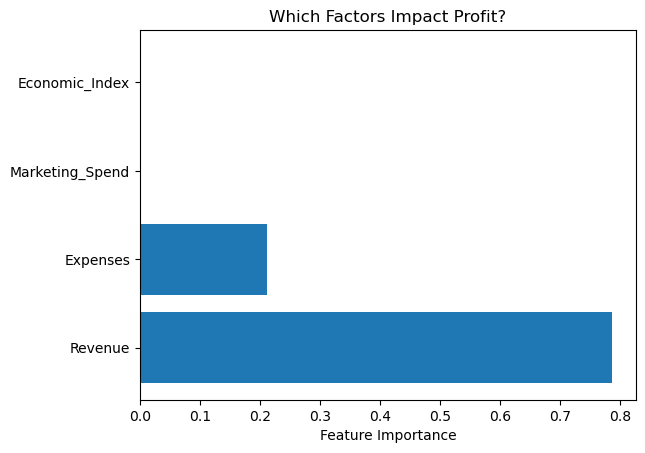

In [19]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
importances = pipeline_rf.named_steps['regressor'].feature_importances_
features = X.columns

# Plot feature importances
plt.barh(features, importances)
plt.xlabel("Feature Importance")  # Fixed line
plt.title("Which Factors Impact Profit?")  # Fixed line
plt.show()

#### 🔄 Export Cleaned Data for Power BI

In [20]:
data.to_csv("financial_data_cleaned.csv", index=False)
print("Data saved for Power BI!")

Data saved for Power BI!
